# China GDP based on polynomial regression

Polynomial regression machine system to estimate the GDP of China. The year is used as the independent variable, and the GDP in US dollars is used as the dependent variable. The proposed system is compared with the sigmoid system.


The dataset for this experiment can be downloaded using this link [China GDP](https://www.geekering.com/wp-content/uploads/2021/04/china_gdp_1960.csv)

To work with this project, multiple libraries and frameworks need to be installed. The following is a list of them.
- [Pandas](https://pandas.pydata.org/)
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Sciki-learn](https://scikit-learn.org/stable/)

Import the required packets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Save the csv file in the dataset variable after reading it. 

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head(3)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10


Plot the relationship between the year and the GDP value to see if there is a linear or non-linear relationship.

Text(0, 0.5, 'GDP value')

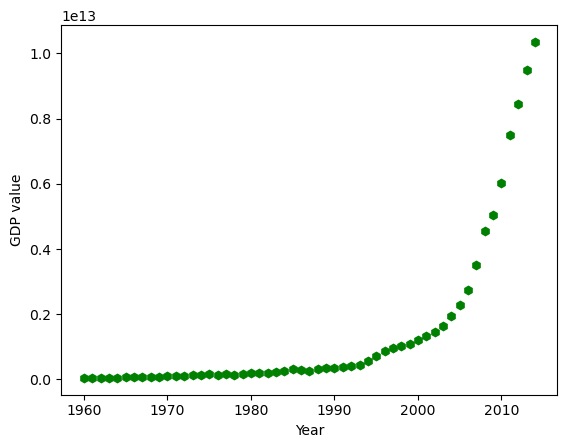

In [3]:
x, y = (dataset["Year"].values, dataset["Value"].values)
plt.plot(x, y, 'gh')
plt.xlabel('Year')
plt.ylabel('GDP value')

Because there are no linear relationships between the independent (year) and dependent (GDP value), a non-linear regression system is required. Two methods will be used to solve this problem. 1-pomomyial regression system, and 2.sigmoid

## 1- Polynomial Regression

Polynomial Regression is a regression approach that uses an nth degree polynomial to represent the relationship between a dependent (y) and independent variable (x). Two degrees of polynomail—the first at degree 2 and the second at degree 3—were then compared between the values to evaluate the performance. 

Polynomail Equation
$$
y = b_{0} + c_{1}x + c_{2}x^{2}  +...  +c_{n}x^{n}
$$

Where n is the degree of the polynomial,b is the intercept, and c is a set of coefficients,

1- After applied two polynomail dgree
$$
GDP_Value = b_{0} + c_{1}year_{1}+ c_{2}year^{2}
$$

2- applied three polynomail dgree
$$
GDP_Value = b_{0} + c_{1}year_{1}+ c_{2}year^{2}+ c_{3}year^{3}
$$

Import the polynomail class for sklearn library

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


Choose 80% of the data for training and 20% for testing. 


In [5]:
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]


train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Value']])

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Value']])

In [6]:
train_x[0:4]

array([[1960],
       [1961],
       [1962],
       [1963]], dtype=int64)

In [7]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

$$\begin{bmatrix}x_{1}\\  x_{2}\\ ...\\x_{n}\end{bmatrix}= \begin{bmatrix}x_{1}& x_{1}^{2} &...  &x_{1}^{n} \\ x_{2}& x_{2}^{2} &...  &x_{1}^{n} \\ ...& ... &...  &... \\ x_{n}& x_{n}^{2} &...  &x_{n}^{n} \\ \end{bmatrix}$$

where x refers to independent variables
Polynimail Regression is special case of Multiple linear regression

In [8]:
train_x_poly[0:2]

array([[1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06]])

After convert applied polynomial call the linear regression

In [9]:
lr = linear_model.LinearRegression()
predict_y = lr.fit(train_x_poly, train_y)

In [10]:
# The coefficients
lr.coef_

array([[ 0.00000000e+00, -2.49958709e+13,  6.31903429e+09]])

In [11]:
# The Intercept
lr.intercept_

array([2.47180156e+16])

Show how the predicted system fits with the data

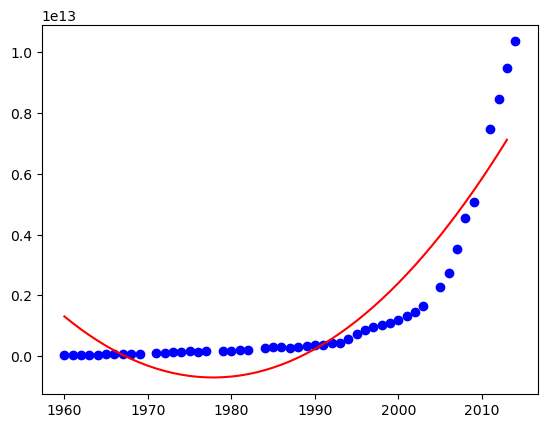

In [12]:
plt.scatter(train.Year, train.Value,  color='blue')


XX = np.arange(1960, 2014, 1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )


Calculate the accuracy 

In [13]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)

test_x[0:2]


array([[1970],
       [1978]], dtype=int64)

> ### Note:  [What and why behind fit_transform() and transform() in scikit-learn!](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)

In [14]:
predict_y_ = lr.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict_y_ ) )

Mean absolute error: 777592934349.64
Residual sum of squares (MSE): 869072026750160910417920.00
R2-score: 0.83
